Eigenvector-field is globally non-orientable. However, it can locally be re-oriented such that all vectors have locally the same orientation. Once the vector field is locally re-oriented, the vector at 'x' is evaluated using linear interpolation. 

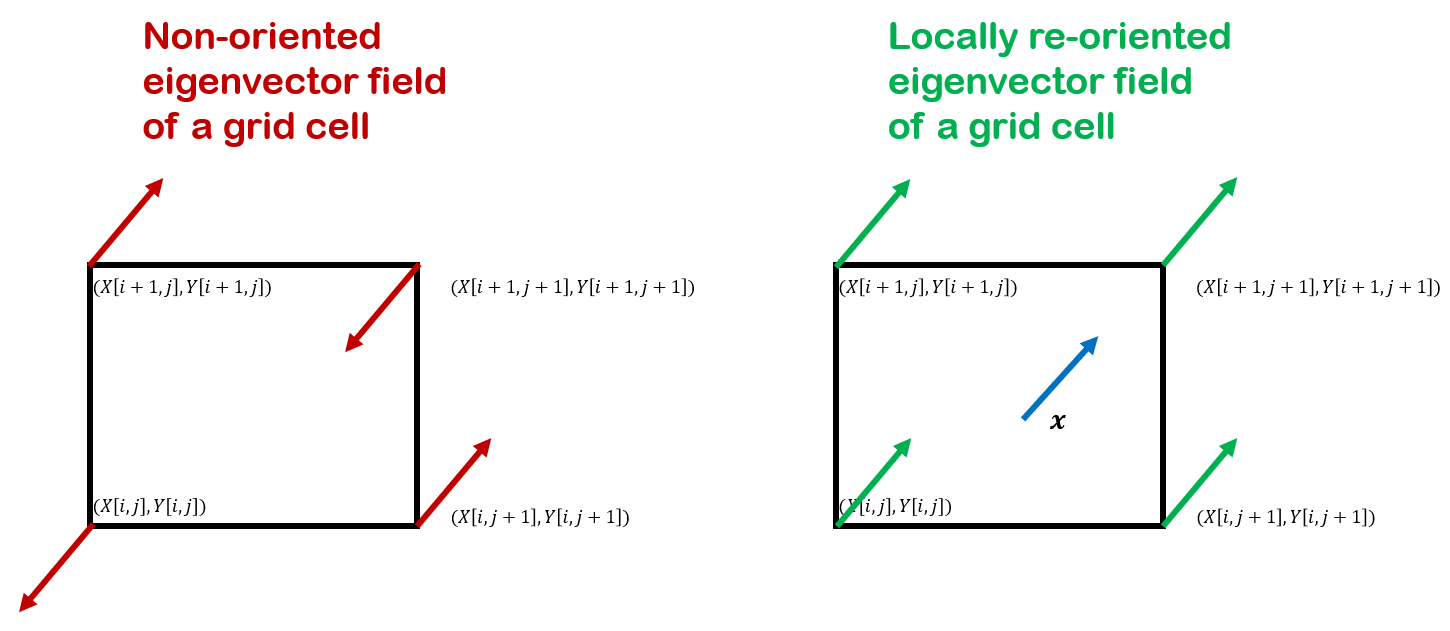

| Name | Type (Shape) | Description |
| --- | --- | --- |
| X | array (Ny, Nx) | X-meshgrid |
| Y | array (Ny, Nx) | Y-meshgrid |
| x | array (2,) | location |
| vector_field | array (Ny, Nx, 2) | eigenvector field |

In [ ]:
# Import numpy
import numpy as np

# import Rectangular bivariate spline from scipy
from scipy.interpolate import RectBivariateSpline as RBS

In [ ]:
def _orient_vectorfield(X, Y, x, vector_field):
    '''
    Eigenvector-field is globally non-orientable. However, it can be globally re-oriented along trajectories.
    This function reorients the eigenvector field locally and evaluates the locally re-oriented eigenvector field at 'x'
    via linear interpolation.
    
    Parameters:
        X, Y:         array(Ny, Nx), gridded X,Y domain
        x:            float, current position of tensorline
        vector_field: array (Ny, Nx, 2), gridded eigenvector field
        
    Returns:
        vx, vy:       float, x/y-components of linearly interpolated eigenvector field at 'x'
    '''
            
    # Check for orientational discontinuity by introducing appropriate scaling
    idx_x = np.searchsorted(X[0,:], x[0]) # float
    idx_y = np.searchsorted(Y[:,0], x[1]) # float
    
    # If not on the boundary of the domain of the data.
    if 0 < idx_x < X.shape[1] and 0 < idx_y < Y.shape[0]:
        
        # extract meshgrid in proximity of particle location (=local meshgrid)
        X_reduced, Y_reduced = X[idx_y-1:idx_y+1, idx_x-1:idx_x+1], Y[idx_y-1:idx_y+1, idx_x-1:idx_x+1] # array (2,2)
    
        # extract vector field in proximity of particle location (=local vector field)
        vx_grid = np.array([[vector_field[idx_y-1,idx_x-1, 0], vector_field[idx_y, idx_x-1, 0]],
                      [vector_field[idx_y-1,idx_x, 0], vector_field[idx_y, idx_x, 0]]]) # array (2,2)
        vy_grid = np.array([[vector_field[idx_y-1,idx_x-1, 1], vector_field[idx_y, idx_x-1, 1]],
                      [vector_field[idx_y-1,idx_x, 1], vector_field[idx_y, idx_x, 1]]]) # array (2,2)
        
        # re-orient the local vector field so that all 4 vectors at the grid-points around x point in the same direction
        for i in range(2):
            for j in range(2):
                if vx_grid[0, 0]*vx_grid[i, j]+vy_grid[0, 0]*vy_grid[i, j] < 0:
                    vx_grid[i, j] = -vx_grid[i, j] # float
                    vy_grid[i, j] = -vy_grid[i, j] # float
    
        # Linearly interpolate vector-field.
        vx_Interp = RBS(Y_reduced[:,0], X_reduced[0,:], vx_grid, kx = 1, ky = 1) # RectangularBivariateSpline object
        vy_Interp = RBS(Y_reduced[:,0], X_reduced[0,:], vy_grid, kx = 1, ky = 1) # RectangularBivariateSpline object
        
        vx = vx_Interp(x[1], x[0])[0][0]
        vy = vy_Interp(x[1], x[0])[0][0]
        
        return vx, vy
    
    # If particle outside of domain of the data --> return None, None
    else:
            
        return None, None